In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('/content/crop_yield.csv')

<ipython-input-2-9fb5ed1e9402>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/crop_yield.csv')


In [3]:
df.duplicated().sum()


0

In [4]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106.0,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110.0,7.248251


In [5]:
df.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
269425,East,Peaty,Soybean,656.703571,34.989487,False,False,Cloudy,82.0,4.533264
269426,North,Peaty,Cotton,972.779797,24.620428,True,False,Sunny,95.0,6.646392
269427,East,Loam,Wheat,110.274898,19.554314,False,True,Rainy,115.0,2.191243
269428,North,Silt,Rice,389.810253,34.088945,True,True,Sunny,108.0,5.521391
269429,West,Silt,Wheat,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269430 entries, 0 to 269429
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  269430 non-null  object 
 1   Soil_Type               269430 non-null  object 
 2   Crop                    269430 non-null  object 
 3   Rainfall_mm             269429 non-null  float64
 4   Temperature_Celsius     269429 non-null  float64
 5   Fertilizer_Used         269429 non-null  object 
 6   Irrigation_Used         269429 non-null  object 
 7   Weather_Condition       269429 non-null  object 
 8   Days_to_Harvest         269429 non-null  float64
 9   Yield_tons_per_hectare  269429 non-null  float64
dtypes: float64(4), object(6)
memory usage: 20.6+ MB


In [7]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [8]:
df.dtypes

,0
Region,object
Soil_Type,object
Crop,object
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,object
Irrigation_Used,object
Weather_Condition,object
Days_to_Harvest,float64
Yield_tons_per_hectare,float64


In [9]:
df.shape

(269430, 10)

In [10]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,1
Temperature_Celsius,1
Fertilizer_Used,1
Irrigation_Used,1
Weather_Condition,1
Days_to_Harvest,1
Yield_tons_per_hectare,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,269429.0,549.816039,259.665829,100.006387,324.768298,550.587808,773.739579,999.996116
Temperature_Celsius,269429.0,27.515719,7.212595,15.000085,21.266686,27.555133,33.760700,39.999700
Days_to_Harvest,269429.0,104.422683,25.937475,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,269429.0,4.648795,1.695673,-0.841617,3.418097,4.650235,5.874933,9.727004


In [12]:
df['Crop'].value_counts()

,count
Crop,
Soybean,45008
Rice,44969
Cotton,44962
Maize,44892
Wheat,44885
Barley,44714


###Feature Understanding

Histogram

Pie

Scatter

Boxplot

KDE

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

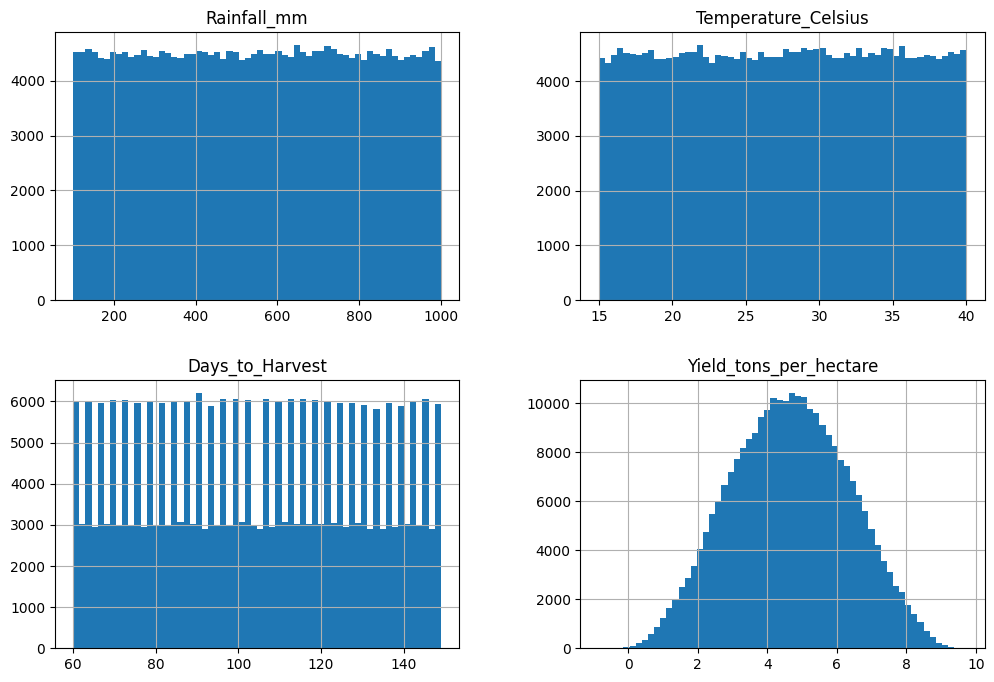

In [14]:
df.hist(bins=60, figsize =(12,8))
plt.show()

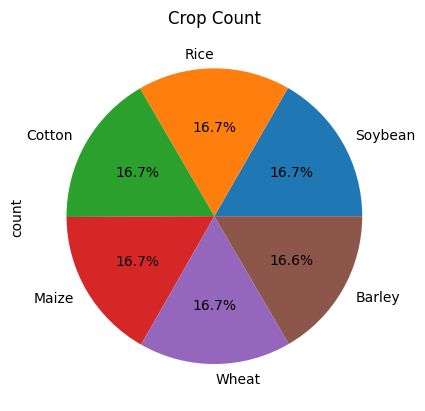

In [15]:
ax = df['Crop'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Crop Count')

plt.show()

In [16]:
df.corr(numeric_only=True)

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000519,-0.001981,0.764604
Temperature_Celsius,-0.000519,1.000000,0.000937,0.085426
Days_to_Harvest,-0.001981,0.000937,1.000000,-0.001357
Yield_tons_per_hectare,0.764604,0.085426,-0.001357,1.000000


<Axes: >

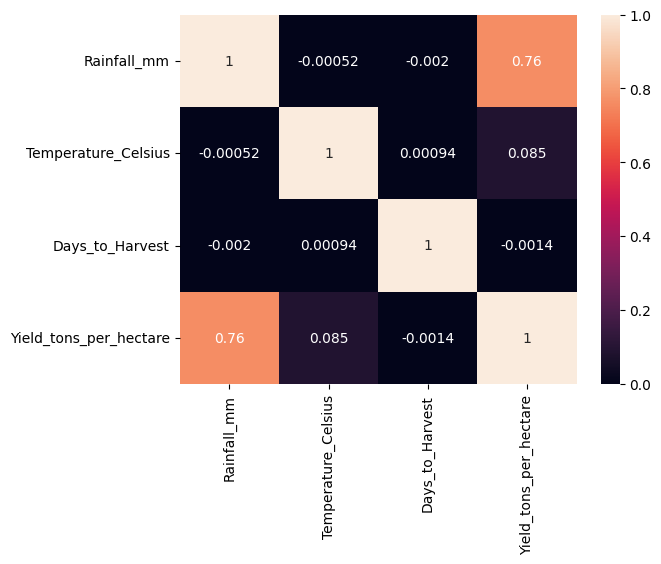

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

The correlation matrix shows that Rainfall_mm has the highest positive correlation with Yield_tons_per_hectare.

Scatter plots help check if the relationship is linear or non-linear.

Since Rainfall has the strongest impact, it is the best feature to visualize with Yield first.



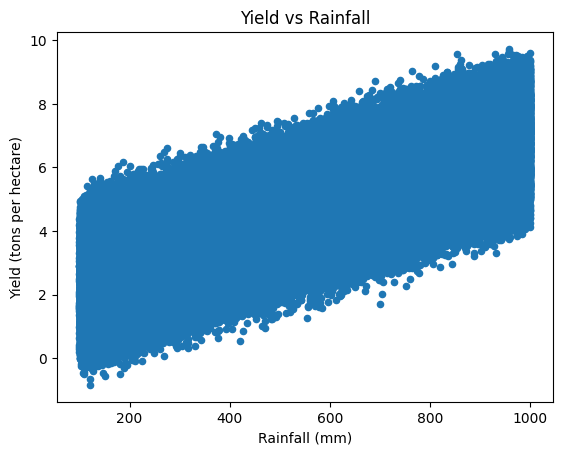

In [18]:
bx = df.plot.scatter(x='Rainfall_mm', y='Yield_tons_per_hectare', title='Yield vs Rainfall')
bx.set_xlabel('Rainfall (mm)')
bx.set_ylabel('Yield (tons per hectare)')

plt.show()

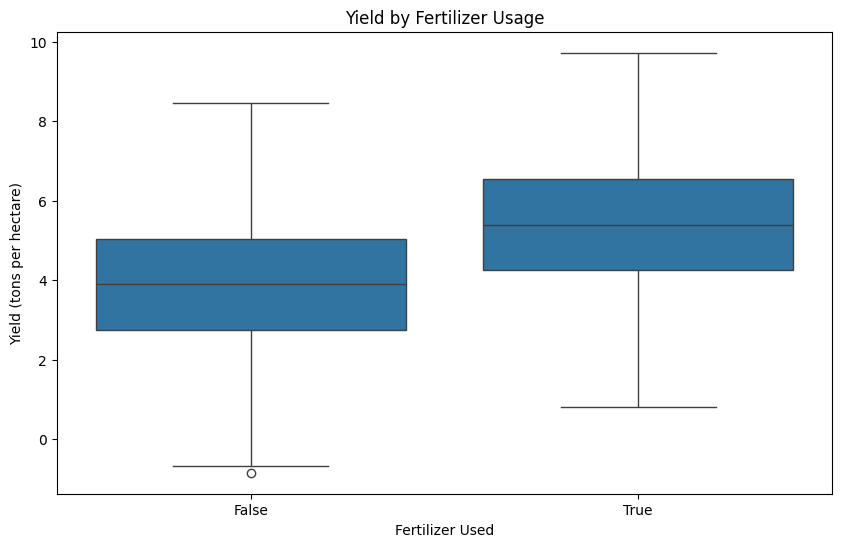

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Fertilizer Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

In [20]:
# Group data by 'Fertilizer_Used'
groups = df.groupby('Fertilizer_Used')

outliers_count = {}

for Fertilizer, group in groups:
    Q1 = group['Yield_tons_per_hectare'].quantile(0.25)
    Q3 = group['Yield_tons_per_hectare'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = group[(group['Yield_tons_per_hectare'] < lower_bound) | (group['Yield_tons_per_hectare'] > upper_bound)]

    # Store the count of outliers for each group
    outliers_count[Fertilizer] = outliers.shape[0]


for Fertilizer, count in outliers_count.items():
    print(f"Outliers in Fertilizer_Used = {Fertilizer}: {count} ")

Outliers in Fertilizer_Used = False: 1 
Outliers in Fertilizer_Used = True: 0 


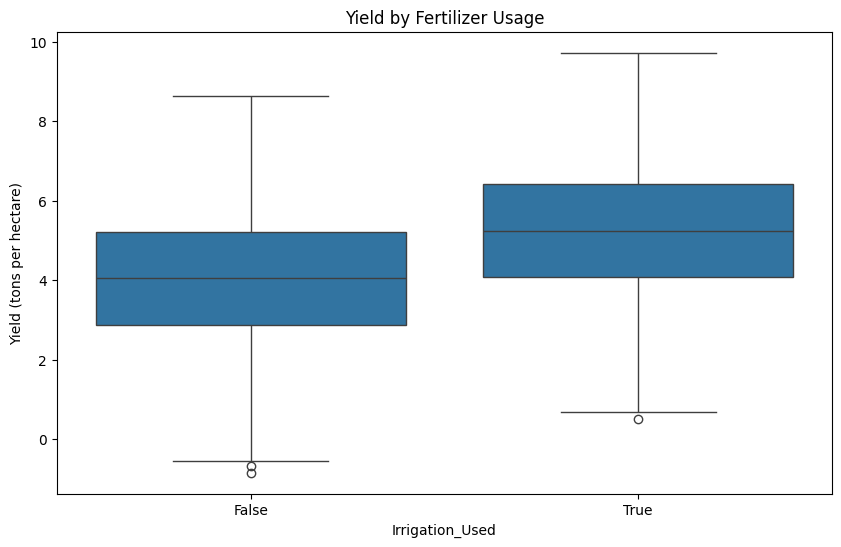

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Irrigation_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Irrigation_Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

In [22]:
# Group data by 'Irrigation_Used'
groups = df.groupby('Irrigation_Used')

outliers_count = {}


for irrigation, group in groups:

    Q1 = group['Yield_tons_per_hectare'].quantile(0.25)
    Q3 = group['Yield_tons_per_hectare'].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = group[(group['Yield_tons_per_hectare'] < lower_bound) | (group['Yield_tons_per_hectare'] > upper_bound)]

    # Store the count of outliers for each group
    outliers_count[irrigation] = outliers.shape[0]

for irrigation, count in outliers_count.items():
    print(f"Outliers in Irrigation_Used = {irrigation}: {count} ")

Outliers in Irrigation_Used = False: 2 
Outliers in Irrigation_Used = True: 1 


 Z-score > 3 or Z-score < -3 indicates that the data point is far from the mean and likely an outlier.

In [23]:



# List of numerical columns
num_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]

# Set Z-score threshold
threshold = 3

# Find and count outliers using Z-score
outliers = {}

for col in num_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = np.abs((df[col] - mean) / std)
        # Find rows where |Z| > 3 (outliers)
        outliers[col] = df[z_scores > threshold]



In [24]:

# Print number of outliers for each column
for col, outlier_data in outliers.items():
    print(f"\nOutliers in {col}: {outlier_data.shape[0]} ")


Outliers in Rainfall_mm: 0 

Outliers in Temperature_Celsius: 0 

Outliers in Days_to_Harvest: 0 

Outliers in Yield_tons_per_hectare: 7 


In [25]:
df = df[z_scores <= threshold]

In [26]:
df.shape

(269422, 10)

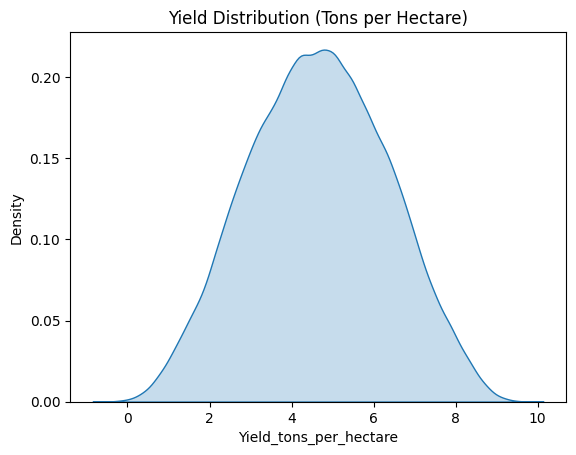

In [27]:
sns.kdeplot(df['Yield_tons_per_hectare'], fill=True)
plt.title('Yield Distribution (Tons per Hectare)')
plt.show()

In [28]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106.0,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110.0,7.248251


###Data Preprocessing

In [29]:
X = df.drop('Yield_tons_per_hectare',axis=1)
y = df.loc[:,'Yield_tons_per_hectare']

In [30]:
X.shape,y.shape

((269422, 9), (269422,))

###Encoding the categorical data

Most ML algorithms handle Boolean values as 0 and 1 internally ,so there is no need to do encoding for boolean column

In [31]:
# label_map = {'Fertilizer_Used': {False: 0, True: 1}, 'Irrigation_Used': {False: 0, True: 1}}
# X.replace(label_map, inplace=True)
# X.head()

If using tree-based models (Random Forest, XGBoost), multicollinearity is not a problem, so you can keep all categories,so drop_first=False

But The dummy variable trap happens when all categories of a categorical variable are included in a regression model, creating perfect multicollinearity
so drop_first=True

In [32]:
X_ohe= pd.get_dummies(X,columns=['Region','Soil_Type','Crop','Weather_Condition'],drop_first=True)

In [33]:
X_ohe.shape

(269422, 20)

In [ ]:
X_ohe.head(5)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False


In [ ]:
X_ohe.dtypes

,0
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,bool
Irrigation_Used,bool
Days_to_Harvest,int64
Region_North,bool
Region_South,bool
Region_West,bool
Soil_Type_Clay,bool
Soil_Type_Loam,bool


**Splitting** the dataset into the Training set and Test set

In [ ]:
#x_ohe_std = (X - X.mean()) / X.std()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80823, 20), (80823,), (20206, 20), (20206,))

###We are planning to apply

Linear Regression

Random Forest

Gradient Boosting
  
**Neural** Networks



###Linear Regression

Linear Regression is one of the simplest and most widely used machine learning algorithms for regression tasks. It is used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables by fitting a linear equation to observed data


In [ ]:
from sklearn.metrics import mean_absolute_error,\
mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

for d in range(1, 3):  # Try different degrees
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"Degree {d}, Mean R²: {scores.mean()}")



Degree 1, Mean R²: 0.9125758723572973
Degree 2, Mean R²: 0.9123577770918263


In [ ]:


best_degree = 2
lr = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)


In [ ]:
test_mae=mean_absolute_error( y_test, y_test_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_test_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4013227500066996
Testing MSE: 0.25207296266105067
Testing R²: 0.9139107764673253


###Ridge

Ridge Regression is a type of linear regression that includes L2 regularization to address multicollinearity and prevent overfitting by adding a penalty to the size of the coefficients. It is particularly useful when the model has many features or the dataset is highly prone to overfitting.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid={
    "alpha" : [0.01,0.1,0.2],
    "max_iter" : [20, 50, 2000]
}
gscv = GridSearchCV(Ridge(random_state=7), param_grid, cv=2, verbose=2)
gscv.fit(X_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)



Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.0s
[CV] END ...........................alpha=0.1, max_iter=2000; total time=   0.0s
[CV] END ...........................alpha=0.1, ma

create best ridge model

In [ ]:

best_degree = 2
ridge = make_pipeline(PolynomialFeatures(degree=best_degree),Ridge(alpha= 0.2 , max_iter = 20, random_state = 7))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.60101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.40132298272222044
Testing MSE: 0.2520731684694923
Testing R²: 0.9139107061785933


###Lasso

The Lasso (Least Absolute Shrinkage and Selection Operator) regression model is a type of linear regression that applies L1 regularization

Lasso adds a penalty to the linear regression cost function, which is the sum of squared residuals (errors) between predicted and actual values. The penalty is proportional to the absolute value of the coefficients, and it shrinks the less important feature coefficients to zero, effectively removing some features from the model

In [ ]:
from sklearn.linear_model import Lasso
gscv = GridSearchCV(Lasso(random_state=7), param_grid, cv=2, verbose=2)
gscv.fit(X_train,y_train)
print(gscv.best_score_)
print(gscv.best_params_)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.1s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.1s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.3s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.1s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   1.2s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.3s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.1s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.1s
[CV] END ...........................alpha=0.1, max_iter=2000; total time=   0.1s
[CV] END ...........................alpha=0.1, ma

In [ ]:
best_degree = 2
lasso = make_pipeline(PolynomialFeatures(degree=best_degree),Lasso(alpha= 0.01 , max_iter = 20, random_state = 7))
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+04, tolerance: 2.314e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4077222758028681
Testing MSE: 0.26028154002704385
Testing R²: 0.9111073419208902


###Ensemble Technique

###Random Forest

Random Forest Regressor, which is an ensemble learning method based on multiple decision trees.
The algorithm combines several decision trees to improve prediction accuracy and reduce overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Reduce trees if needed for performance
    max_depth=15,  # Limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1  # Use all available processors
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
mae=mean_absolute_error( y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.4092
MSE: 0.2622
R² Score: 0.9105


###Gradient Boosting

Gradient Boosting is a method that combines multiple simple models to create a stronger one. Each new model learns from the mistakes of the previous ones, improving accuracy step by step. This process helps make better predictions over time.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(
    n_estimators=200,  # Number of trees
    learning_rate=0.05,  # Step size
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,  # Use 80% of data per tree
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=200,
                          random_state=42, subsample=0.8)

In [ ]:
y_pred = gb_model.predict(X_test)
mae=mean_absolute_error( y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.4025
MSE: 0.2536
R² Score: 0.9134


###Neural Networks

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
n_features = X_train.shape[1]
n_features

20

In [ ]:
# define model
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 806 (3.15 KB)

 Trainable params: 806 (3.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
884/884 - 6s - 7ms/step - loss: 0.2576 - mae: 0.4052 - val_loss: 0.2673 - val_mae: 0.4128
Epoch 2/100
884/884 - 7s - 7ms/step - loss: 0.2577 - mae: 0.4053 - val_loss: 0.2673 - val_mae: 0.4128
Epoch 3/100
884/884 - 4s - 5ms/step - loss: 0.2577 - mae: 0.4053 - val_loss: 0.2674 - val_mae: 0.4128
Epoch 4/100
884/884 - 3s - 4ms/step - loss: 0.2577 - mae: 0.4053 - val_loss: 0.2676 - val_mae: 0.4130
Epoch 5/100
884/884 - 2s - 3ms/step - loss: 0.2576 - mae: 0.4052 - val_loss: 0.2678 - val_mae: 0.4131
Epoch 6/100
884/884 - 2s - 3ms/step - loss: 0.2576 - mae: 0.4052 - val_loss: 0.2680 - val_mae: 0.4133
Epoch 7/100
884/884 - 2s - 3ms/step - loss: 0.2575 - mae: 0.4051 - val_loss: 0.2681 - val_mae: 0.4134
Epoch 8/100
884/884 - 4s - 4ms/step - loss: 0.2575 - mae: 0.4051 - val_loss: 0.2683 - val_mae: 0.4136
Epoch 9/100
884/884 - 2s - 2ms/step - loss: 0.2574 - mae: 0.4050 - val_loss: 0.2685 - val_mae: 0.4137
Epoch 10/100
884/884 - 3s - 3ms/step - loss: 0.2574 - mae: 0.4050 - val_loss: 0.26

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.4f' % mae)

Test mae: 0.4172


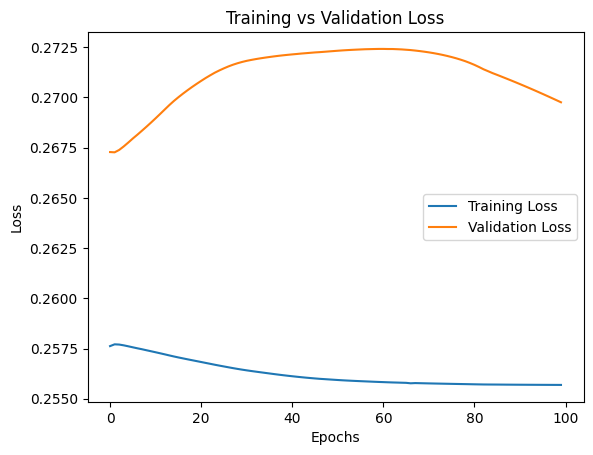

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4172065253190911
Testing MSE: 0.27110919275362855
Testing R²: 0.9074094276103954


###Dropout Layer

In [ ]:
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
#model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model1.compile(optimizer='Adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
#from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model1.fit(X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2, shuffle=False
                    )

Epoch 1/100
884/884 - 5s - 6ms/step - loss: 66.7763 - mae: 4.0886 - val_loss: 2.3374 - val_mae: 1.2383
Epoch 2/100
884/884 - 5s - 5ms/step - loss: 6.5329 - mae: 1.9879 - val_loss: 2.0467 - val_mae: 1.1572
Epoch 3/100
884/884 - 2s - 3ms/step - loss: 3.3295 - mae: 1.4443 - val_loss: 1.5275 - val_mae: 1.0054
Epoch 4/100
884/884 - 2s - 3ms/step - loss: 2.0577 - mae: 1.1449 - val_loss: 1.3750 - val_mae: 0.9558
Epoch 5/100
884/884 - 3s - 4ms/step - loss: 1.7287 - mae: 1.0622 - val_loss: 1.3834 - val_mae: 0.9584
Epoch 6/100
884/884 - 5s - 5ms/step - loss: 1.6362 - mae: 1.0358 - val_loss: 1.3449 - val_mae: 0.9448
Epoch 7/100
884/884 - 2s - 3ms/step - loss: 1.5157 - mae: 0.9989 - val_loss: 1.2400 - val_mae: 0.9070
Epoch 8/100
884/884 - 2s - 3ms/step - loss: 1.2709 - mae: 0.9135 - val_loss: 0.9229 - val_mae: 0.7798
Epoch 9/100
884/884 - 3s - 4ms/step - loss: 0.6777 - mae: 0.6530 - val_loss: 0.3368 - val_mae: 0.4637
Epoch 10/100
884/884 - 4s - 5ms/step - loss: 0.3873 - mae: 0.4948 - val_loss: 0.2

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 0.416


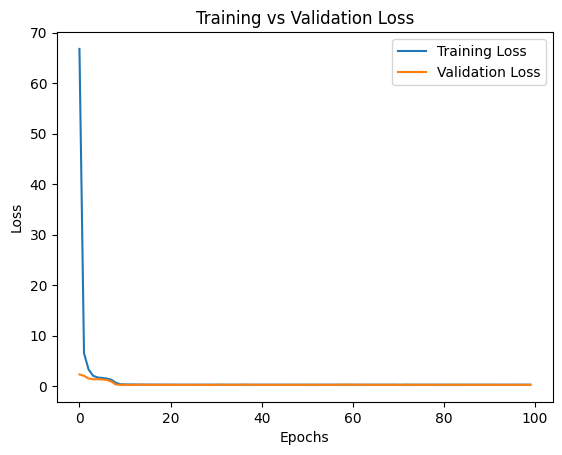

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.41632507334269614
Testing MSE: 0.27065156603030754
Testing R²: 0.907565718586082


###Batch Normalization layer

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
884/884 - 6s - 7ms/step - loss: 2.7339 - mae: 1.1191 - val_loss: 0.5727 - val_mae: 0.6062
Epoch 2/100
884/884 - 2s - 3ms/step - loss: 0.3968 - mae: 0.4904 - val_loss: 0.3400 - val_mae: 0.4637
Epoch 3/100
884/884 - 3s - 3ms/step - loss: 0.3506 - mae: 0.4686 - val_loss: 0.8889 - val_mae: 0.7897
Epoch 4/100
884/884 - 3s - 4ms/step - loss: 0.3348 - mae: 0.4607 - val_loss: 1.3712 - val_mae: 0.9874
Epoch 5/100
884/884 - 6s - 6ms/step - loss: 0.3313 - mae: 0.4587 - val_loss: 2.1605 - val_mae: 1.2579
Epoch 6/100
884/884 - 7s - 8ms/step - loss: 0.3308 - mae: 0.4585 - val_loss: 1.9165 - val_mae: 1.1735
Epoch 7/100
884/884 - 3s - 4ms/step - loss: 0.3298 - mae: 0.4577 - val_loss: 2.1982 - val_mae: 1.2621
Epoch 8/100
884/884 - 6s - 7ms/step - loss: 0.3291 - mae: 0.4574 - val_loss: 2.4451 - val_mae: 1.3354
Epoch 9/100
884/884 - 2s - 3ms/step - loss: 0.3285 - mae: 0.4571 - val_loss: 1.3051 - val_mae: 0.9564
Epoch 10/100
884/884 - 3s - 4ms/step - loss: 0.3278 - mae: 0.4565 - val_loss: 1.59

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 0.415


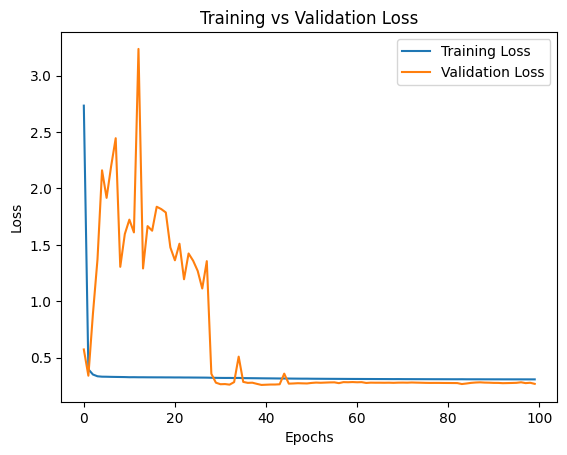

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4151951488518703
Testing MSE: 0.2686656113268686
Testing R²: 0.9082439718052502


###L1 & L2 regularization

In [ ]:
from tensorflow.keras import regularizers
model1 = Sequential()
model1.add(Dense(5,  kernel_regularizer=regularizers.L1L2(),
                 activation='relu', input_shape=(n_features,)))
model1.add(Dense(100, activation='relu'))
#model1.add(Dense(400, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
model1.compile(optimizer=Adam(learning_rate=0.001),loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=64,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
884/884 - 5s - 5ms/step - loss: 12.6712 - mae: 1.6895 - val_loss: 1.2207 - val_mae: 0.9006
Epoch 2/100
884/884 - 3s - 4ms/step - loss: 1.1772 - mae: 0.8853 - val_loss: 1.0244 - val_mae: 0.8247
Epoch 3/100
884/884 - 4s - 5ms/step - loss: 0.9827 - mae: 0.8069 - val_loss: 0.7783 - val_mae: 0.7178
Epoch 4/100
884/884 - 3s - 3ms/step - loss: 0.7114 - mae: 0.6826 - val_loss: 0.5016 - val_mae: 0.5695
Epoch 5/100
884/884 - 6s - 6ms/step - loss: 0.4485 - mae: 0.5347 - val_loss: 0.2934 - val_mae: 0.4325
Epoch 6/100
884/884 - 5s - 5ms/step - loss: 0.3562 - mae: 0.4743 - val_loss: 0.4919 - val_mae: 0.5727
Epoch 7/100
884/884 - 4s - 5ms/step - loss: 0.3566 - mae: 0.4732 - val_loss: 0.5246 - val_mae: 0.5937
Epoch 8/100
884/884 - 4s - 4ms/step - loss: 0.3509 - mae: 0.4693 - val_loss: 0.4797 - val_mae: 0.5644
Epoch 9/100
884/884 - 4s - 5ms/step - loss: 0.3466 - mae: 0.4665 - val_loss: 0.4366 - val_mae: 0.5355
Epoch 10/100
884/884 - 2s - 3ms/step - loss: 0.3428 - mae: 0.4641 - val_loss: 0.3

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 0.402


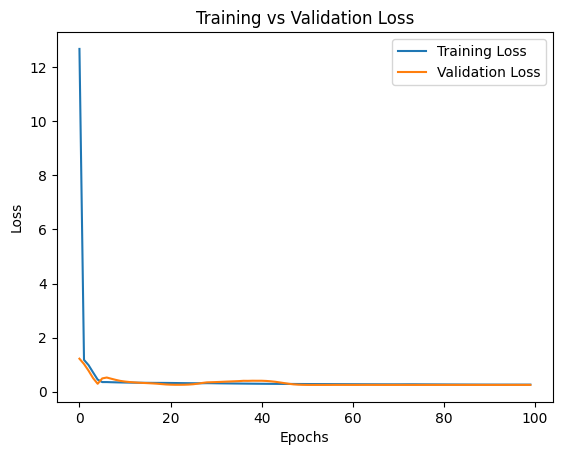

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [ ]:
y_pred = model1.predict(X_test)

632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:


test_mae=mean_absolute_error( y_test, y_pred)
print(f"Testing MAE: {test_mae}")
test_mse=mean_squared_error( y_test, y_pred)
print(f"Testing MSE: {test_mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Testing R²: {test_r2}")

Testing MAE: 0.4023254898985386
Testing MSE: 0.25307251753776366
Testing R²: 0.9135694034683884


creating pickle file

In [ ]:
import pickle
pickle.dump(ridge,open('model.pkl','wb'))

In [ ]:
import pickle

# Save the column names after one-hot encoding
X_ohe_columns = X_ohe.columns.to_list()
pickle.dump(X_ohe_columns, open('X_columns.pkl', 'wb'))

In [ ]:
import numpy as np

# Example input data after One-Hot Encoding
encoded_input = [
    897.077239,  # Rainfall_mm
    27.676966,   # Temperature_Celsius
    0,            # Fertilizer_Used (False -> 0)
    1,            # Irrigation_Used (True -> 1)
    122,          # Days_to_Harvest
    0,            # Region_North (encoded)
    0,            # Region_South (encoded)
    1,            # Region_West (encoded)
    0,            # Soil_Type_Clay (encoded)
    0,            # Soil_Type_Loam (encoded)
    0,            # Soil_Type_Peaty (encoded)
    1,            # Soil_Type_Sandy (encoded)
    0,            # Soil_Type_Silt (encoded)
    1,            # Crop_Cotton (encoded)
    0,            # Crop_Maize (encoded)
    0,            # Crop_Rice (encoded)
    0,            # Crop_Soybean (encoded)
    0,            # Crop_Wheat (encoded)
    0,            # Weather_Condition_Rainy (encoded)
    0             # Weather_Condition_Sunny (encoded)
]

# Convert the input into a 2D NumPy array (1 row, number_of_features columns)
encoded_input = np.array([encoded_input])

# Load the pickled model
model = pickle.load(open('model.pkl', 'rb'))

# Make the prediction
y_pred = model.predict(encoded_input)

# Output the prediction
print("Prediction:", y_pred)


Prediction: [6.23818441]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
